In [144]:
import tensorflow as tf
import numpy as np
import random

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# Only need '%matplotlib inline' when running in ipython notebook.
import matplotlib.pyplot as plt

In [145]:
def get_data(set_type):
    """Get data from files and storage them in a array. Return the data_set and label_set.
    
    set_type    the type of data set you want to build, including train dataset, dev dataset 
                and eval dataset
    """
    
    data_path = {'train': 'train/lab/hw1train_labels.txt', 'dev': 'dev/lab/hw1dev_labels.txt', \
                 'eval': 'eval/lab/hw1eval_labels.txt'} 

    label_array = np.loadtxt(data_path[set_type], dtype='string')

    #creat empty arrays to insert label and data
    label_set = np.zeros([len(label_array), 2])
    data_set = np.zeros([len(label_array), 16])

    #the first column of the label file is the label,
    #the second column is the corresbonding data file nam
    for i in range(len(label_set)): 
        
        #build the label set
        if int(label_array[i][0]) == 0:
            label_set[i][0] = 1 #insert label into label_set
        else:
            label_set[i][1] = 1
            
        #build the data set
        with open(label_array[i][1]) as data_file:
            data = data_file.readlines()[0].split() #find the data accoding to label
        for j in range(len(data)):
            data_set[i][j] = data[j] #insert data into the dataset
            
    data_set, label_set = nan_check(data_set, label_set) #delete the rows containing 'nan'
    
    return data_set, label_set #return the data set and label set


In [146]:
def nan_check(data, label):
    """Find out the rows in datasets and delete these rows
    
    """
    
    nan_rows = np.array(0); #define an array containg the no. of rows having 'nan'
    
    #collect all the numbers of 'nan'-data rows
    for i in range(len(data)):
        for j in range(16):
            if str(data[i][j]) == 'nan':
                nan_rows = np.append(nan_rows, i)
    nan_rows = np.delete(nan_rows, 0) #delete the first element of nan_rows which was made to fit the append()
    
    return np.delete(data, nan_rows, 0), np.delete(label, nan_rows, 0) #output the dataset whose 'nan'-data rows have been deleted


In [147]:
def shuffle(data_set, label_set):
    """Randomly shuffle the data and label
    
    data_set    the data samples
    
    label_set   the lables
    """
    
    shuffled_data = np.zeros((data_set.shape))
    shuffled_label = np.zeros((label_set.shape))
    idx = np.array(xrange(len(label_set)))
    random.shuffle(idx)
    i = 0
    for j in idx:
        shuffled_data[i] = data_set[int(j)]
        shuffled_label[i] = label_set[int(j)]
        i += 1
    return shuffled_data, shuffled_label

In [158]:
train_data, train_label = get_data('train')
train_data, train_label = shuffle(train_data, train_label)
print train_data.shape, train_label.shape


(8774, 16) (8774, 2)


In [161]:
x_placeholder = tf.placeholder(tf.float32, [None, 16])
y_placeholder = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.random_normal([16, 2]))
b = tf.Variable(tf.zeros([2]))
y_hat = tf.nn.softmax(tf.matmul(x_placeholder, w) + b)

loss = tf.reduce_sum(tf.square(y_placeholder-y_hat)) / train_data.shape[0]

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

y_error = []

for step in range(2000):
    feed_dict = {x_placeholder: train_data, y_placeholder: train_label}
    sess.run(train_step, feed_dict=feed_dict)
    loss_np = sess.run(loss, feed_dict=feed_dict)
    
    if step % 20 == 0:
        print("Loss at step %d: %f" % (step, loss_np))
        y_error.append(loss_np)
print sess.run(w)


Loss at step 0: 0.604748
Loss at step 20: 0.568247
Loss at step 40: 0.539844
Loss at step 60: 0.517532
Loss at step 80: 0.499523
Loss at step 100: 0.484421
Loss at step 120: 0.471251
Loss at step 140: 0.459400
Loss at step 160: 0.448505
Loss at step 180: 0.438349
Loss at step 200: 0.428799
Loss at step 220: 0.419767
Loss at step 240: 0.411188
Loss at step 260: 0.403012
Loss at step 280: 0.395200
Loss at step 300: 0.387720
Loss at step 320: 0.380548
Loss at step 340: 0.373663
Loss at step 360: 0.367046
Loss at step 380: 0.360684
Loss at step 400: 0.354562
Loss at step 420: 0.348667
Loss at step 440: 0.342989
Loss at step 460: 0.337514
Loss at step 480: 0.332235
Loss at step 500: 0.327142
Loss at step 520: 0.322230
Loss at step 540: 0.317491
Loss at step 560: 0.312920
Loss at step 580: 0.308512
Loss at step 600: 0.304261
Loss at step 620: 0.300163
Loss at step 640: 0.296212
Loss at step 660: 0.292403
Loss at step 680: 0.288729
Loss at step 700: 0.285186
Loss at step 720: 0.281767
Loss at

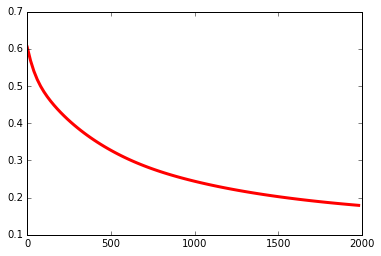

In [162]:

x_axis = np.arange(0, 2000, 20)

plt.plot(x_axis, y_error,'r', linewidth=3)